# SET-1

In [1]:
#import libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [4]:
#load the dataset
crime=pd.read_csv(r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\7. Clustering\crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
#Normalization function
#use sklearn library norm
def norm_func(i):
  X=(i-i.min())/(i.max()-i.min())
  return(X)

In [6]:
#normalized data frame(considering the numerical part of data)
df_norm=norm_func(crime.iloc[:,1:])

In [7]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# Dendrogram

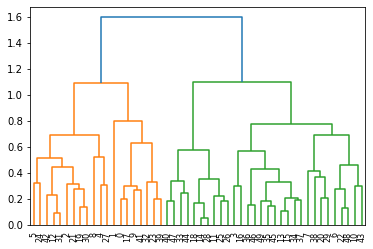

In [8]:
#Create Dendrogram
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='complete'))

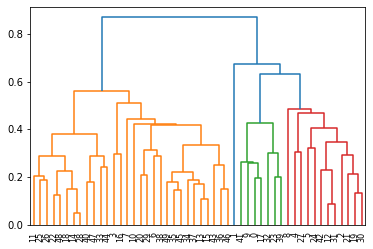

In [9]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [10]:
#Create Clusters
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')

In [11]:
hc.fit(df_norm)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [12]:
#save clusters for chart
y_hc=hc.fit_predict(df_norm)

In [13]:
y_hc

array([3, 4, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0], dtype=int64)

In [14]:
clusters=pd.DataFrame(y_hc,columns=['clusters']) 

In [15]:
crime['h_clusterid']=y_hc

### K Means Clustering

In [16]:
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist

In [19]:
crime1=pd.read_csv(r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\7. Clustering\crime_data.csv")

In [20]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [21]:
def_norm=norm_func(crime.iloc[:,1:])

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


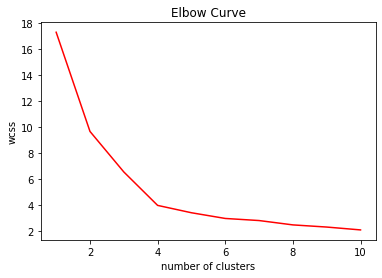

In [22]:
#elbow curve

wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(def_norm)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss, color='red')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.title('Elbow Curve')
plt.show()

In [23]:
#selecting 4 cluster for scree plot
model=KMeans(n_clusters=4)
model.fit(def_norm)
model.labels_

array([3, 3, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [24]:
x=pd.Series(model.labels_)
crime1['Clust']=x

In [25]:
crime1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


### DBSCAN

In [26]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [40]:
crime2=pd.read_csv(r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\7. Clustering\crime_data.csv")

In [41]:
crime2.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [42]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [43]:
df=crime2.iloc[:,1:5]

In [44]:
df.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [45]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [46]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [47]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [48]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [49]:
pd.concat([crime2,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


# ---------------------------------------------------------------------------------------------------------------

# SET-2

In [50]:
#Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
#Draw the inferences from the clusters obtained.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from openpyxl import load_workbook

# Hierarchical Clustering

In [51]:
EW=pd.DataFrame()

In [52]:
xlfname=r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\7. Clustering\EastWestAirlines.xlsx"
xl=pd.ExcelFile(xlfname)

for sheet in xl.sheet_names:
  df_tmp=xl.parse(sheet)
EW=EW.append(df_tmp,ignore_index=True,sort=False)
csvfile='sample.csv'
EW.to_csv(csvfile,index=False)
EW.head()

C:\Users\PC\AppData\Local\Temp\ipykernel_17708\1634259073.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  EW=EW.append(df_tmp,ignore_index=True,sort=False)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [53]:
#from description we drop the telecom and CHAR columns
EW1=EW.drop(['ID#','cc1_miles','cc2_miles','cc3_miles','Days_since_enroll','Award?'],axis=1)

In [54]:
EW1

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,28143,0,174,1,0,0
1,19244,0,215,2,0,0
2,41354,0,4123,4,0,0
3,14776,0,500,1,0,0
4,97752,0,43300,26,2077,4
...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1
3995,64385,0,981,5,0,0
3996,73597,0,25447,8,0,0
3997,54899,0,500,1,500,1


In [55]:
def func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [56]:
df=func(EW1)

In [57]:
df.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472


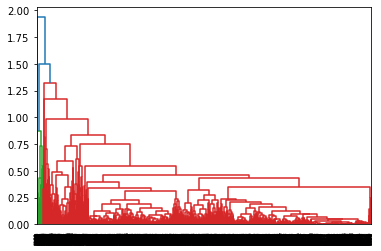

In [58]:
dendrogram=sch.dendrogram(sch.linkage(df,method='complete'))

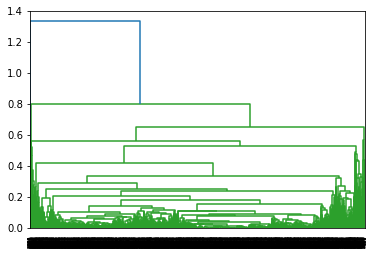

In [59]:
dendrogram=sch.dendrogram(sch.linkage(df,method='average'))b

In [60]:
hc=AgglomerativeClustering(n_clusters=3,linkage='complete')

In [61]:
y=hc.fit_predict(df)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
EW1['cluster']=y
EW1

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,cluster
0,28143,0,174,1,0,0,0
1,19244,0,215,2,0,0,0
2,41354,0,4123,4,0,0,0
3,14776,0,500,1,0,0,0
4,97752,0,43300,26,2077,4,0
...,...,...,...,...,...,...,...
3994,18476,0,8525,4,200,1,0
3995,64385,0,981,5,0,0,0
3996,73597,0,25447,8,0,0,0
3997,54899,0,500,1,500,1,0


In [63]:
EW1['cluster'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
EW.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [65]:
EW1=EW.drop(['ID#'],axis=1)

In [66]:
EW1.head

<bound method NDFrame.head of       Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0       28143           0          1          1          1          174   
1       19244           0          1          1          1          215   
2       41354           0          1          1          1         4123   
3       14776           0          1          1          1          500   
4       97752           0          4          1          1        43300   
...       ...         ...        ...        ...        ...          ...   
3994    18476           0          1          1          1         8525   
3995    64385           0          1          1          1          981   
3996    73597           0          3          1          1        25447   
3997    54899           0          1          1          1          500   
3998     3016           0          1          1          1            0   

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enr

In [67]:
def func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [68]:
bf=func(EW1)
bf

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


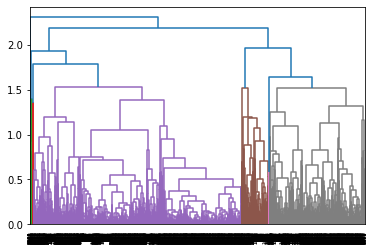

In [69]:
#dendrogram
dendrogram=sch.dendrogram(sch.linkage(bf,method='complete'))

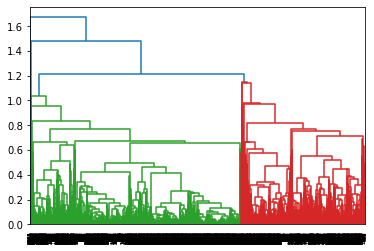

In [71]:
dendrogram=sch.dendrogram(sch.linkage(bf,method='average'))

In [73]:
yc=AgglomerativeClustering(n_clusters=8,linkage='complete')

In [74]:
f=yc.fit_predict(bf)

# K-means clustering

In [76]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [77]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [78]:
fd=norm_func(EW1.iloc[:,1:])
fd

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...
3994,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


Text(0, 0.5, 'wcss')

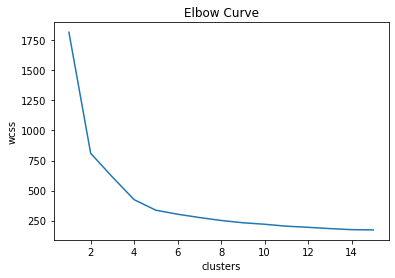

In [79]:
wcss=[]
for i in range(1,16):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(fd)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,16),wcss)
plt.title('Elbow Curve')
plt.xlabel('clusters')
plt.ylabel('wcss')

In [80]:
#from Elbow Curve we have to decide 8 clusters
m1=KMeans(n_clusters=8)
m1.fit(fd)

KMeans()

In [81]:
m1.labels_

array([7, 7, 7, ..., 5, 1, 1])

In [82]:
md=pd.Series(m1.labels_)
EW1['cluster']=md
EW1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,7
1,19244,0,1,1,1,215,2,0,0,6968,0,7
2,41354,0,1,1,1,4123,4,0,0,7034,0,7
3,14776,0,1,1,1,500,1,0,0,6952,0,7
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,6
3995,64385,0,1,1,1,981,5,0,0,1395,1,6
3996,73597,0,3,1,1,25447,8,0,0,1402,1,5
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [83]:
EW1.iloc[:,1:11].groupby(EW1.cluster).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,
0,234.061798,4.547753,1.000000,1.056180,66464.668539,22.735955,977.904494,2.960674,6028.637640,1.0
1,94.131783,1.070736,1.016473,1.006783,3244.520349,6.173450,212.850775,0.603682,1992.402132,0.0
2,362.046154,1.156923,1.030769,1.018462,9042.529231,10.843077,1027.726154,3.280000,6066.513846,1.0
3,54.723684,3.703947,1.000000,1.026316,33994.559211,17.174342,219.851974,0.684211,6080.861842,0.0
4,91.614650,3.468153,1.003185,1.019108,28857.353503,17.289809,228.213376,0.573248,2811.152866,0.0
5,170.199115,3.418142,1.002212,1.002212,29184.028761,18.205752,505.661504,1.497788,3945.716814,1.0
6,223.591954,1.155172,1.034483,1.000000,8670.959770,10.135057,1032.341954,3.025862,2725.405172,1.0
7,89.903226,1.122120,1.019585,1.001152,3467.074885,6.913594,243.834101,0.728111,5567.925115,0.0


# DBSCAN

In [85]:
EW=pd.DataFrame()
xlfname=r"C:\Users\PC\Downloads\Data Science\Data Science Assignments\7. Clustering\EastWestAirlines.xlsx"
xl=pd.ExcelFile(xlfname)

for sheet in xl.sheet_names:
  df_tmp=xl.parse(sheet)
EW=EW.append(df_tmp,ignore_index=True,sort=False)
csvfile='sample.csv'
EW.to_csv(csvfile,index=False)

C:\Users\PC\AppData\Local\Temp\ipykernel_17708\3204906350.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  EW=EW.append(df_tmp,ignore_index=True,sort=False)


In [86]:
EW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [87]:
array=EW.values
array

array([[    1, 28143,     0, ...,     0,  7000,     0],
       [    2, 19244,     0, ...,     0,  6968,     0],
       [    3, 41354,     0, ...,     0,  7034,     0],
       ...,
       [ 4019, 73597,     0, ...,     0,  1402,     1],
       [ 4020, 54899,     0, ...,     1,  1401,     0],
       [ 4021,  3016,     0, ...,     0,  1398,     0]], dtype=int64)

In [88]:
from sklearn.preprocessing import StandardScaler
stscaler=StandardScaler().fit(array)
x=stscaler.transform(array)

In [89]:
dbs=DBSCAN(eps=2,min_samples=12)
dbs.fit(x)

DBSCAN(eps=2, min_samples=12)

In [90]:
y=dbs.fit_predict(x)

In [91]:
dbs.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [92]:
cl=pd.DataFrame(y,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [93]:
pd.concat([EW,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0
